In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import tkinter as tk
from tkinter import messagebox

# Dữ liệu chiều cao, cân nặng và nghề nghiệp
heights = np.array([1.6, 1.5, 1.7]).reshape(-1, 1)
weights = np.array([55, 50, 75])
jobs = np.array(["Worker", "Office Staff", "Athlete"]).reshape(-1, 1)

# Chuyển đổi nghề nghiệp thành dạng số (sử dụng OneHotEncoder)
column_transformer = ColumnTransformer([('job', OneHotEncoder(), [0])], remainder='passthrough')
jobs_encoded = column_transformer.fit_transform(jobs)

# Kết hợp chiều cao và nghề nghiệp thành một ma trận đặc trưng
X = np.hstack((heights, jobs_encoded))

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, weights)

# Hàm để dự đoán cân nặng dựa trên chiều cao và nghề nghiệp nhập vào
def predict_weight():
    try:
        height_input = float(entry_height.get())
        job_input = job_var.get()

        # Chuyển đổi nghề nghiệp nhập vào thành dạng one-hot
        job_encoded_input = column_transformer.transform([[job_input]])

        # Tạo đầu vào cho mô hình dự đoán
        X_new = np.hstack(([[height_input]], job_encoded_input))

        # Dự đoán cân nặng
        predicted_weight = model.predict(X_new)
        messagebox.showinfo("Prediction Result", f"Predicted weight for height {height_input} m and job {job_input}: {predicted_weight[0]:.2f} kg")

    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter a valid number for height.")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Tạo giao diện người dùng với tkinter
root = tk.Tk()
root.title("Weight Prediction")

# Nhãn và trường nhập cho chiều cao
label_height = tk.Label(root, text="Enter Height (m):")
label_height.pack()
entry_height = tk.Entry(root)
entry_height.pack()

# Nhãn và hộp chọn cho nghề nghiệp
label_job = tk.Label(root, text="Select Job:")
label_job.pack()

job_var = tk.StringVar(value="Worker")  # Giá trị mặc định
job_menu = tk.OptionMenu(root, job_var, "Worker", "Office Staff", "Athlete")
job_menu.pack()

# Nút để dự đoán
predict_button = tk.Button(root, text="Predict Weight", command=predict_weight)
predict_button.pack()

# Chạy giao diện người dùng
root.mainloop()


In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import random

# Generate synthetic data for 2000 persons
np.random.seed(42)
num_samples = 2000

# Random heights (between 1.5 m and 2.0 m)
heights = np.random.uniform(1.5, 2.0, num_samples)

# Generate 30 random jobs
jobs = ['Doctor', 'Dentist', 'Engineer', 'Teacher', 'Artist', 'Chef', 'Lawyer', 'Nurse',
        'Journalist', 'Pharmacist', 'Scientist', 'Pilot', 'Police Officer', 'Firefighter',
        'Plumber', 'Electrician', 'Mechanic', 'Architect', 'Programmer', 'Musician',
        'Accountant', 'Biologist', 'Physicist', 'Surgeon', 'Therapist', 'Farmer',
        'Librarian', 'Economist', 'Psychologist', 'Athlete']
job_samples = random.choices(jobs, k=num_samples)

# Random weights based on height to generate somewhat realistic values
weights = heights * 25 + np.random.normal(0, 10, num_samples)  # Rough weight estimation

# Create a DataFrame
data = pd.DataFrame({
    'Height': heights,
    'Weight': weights,
    'Job': job_samples
})

# Calculate BMI
data['BMI'] = data['Weight'] / (data['Height'] ** 2)

# Classify BMI (Underweight, Normal, Overweight)
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 25, np.inf], labels=['Underweight', 'Normal', 'Overweight'])

# Display first few rows
print(data.head())

# Encode job types (OneHotEncoding)
column_transformer = ColumnTransformer([('job', OneHotEncoder(), ['Job'])], remainder='passthrough')
X = column_transformer.fit_transform(data[['Job', 'Height']])

# Linear regression model to predict weight
linear_model = LinearRegression()
linear_model.fit(X, data['Weight'])

# Logistic regression to classify weight category (Underweight, Normal, Overweight)
logistic_model = LogisticRegression(multi_class='ovr', max_iter=1000)
logistic_model.fit(X, data['BMI_Category'])

# Predict weight and BMI category based on height and job type
def predict_weight_and_bmi_category(height, job):
    try:
        # Create a DataFrame for the new input
        new_data = pd.DataFrame({'Height': [height], 'Job': [job]})

        # Transform job input using the same column transformer
        job_encoded_input = column_transformer.transform(new_data)

        # Predict weight
        predicted_weight = linear_model.predict(job_encoded_input)

        # Predict BMI category
        predicted_bmi_category = logistic_model.predict(job_encoded_input)

        return predicted_weight[0], predicted_bmi_category[0]

    except Exception as e:
        print(f"Error occurred: {str(e)}")

# Example prediction
height_input = 1.75
job_input = 'Engineer'
predicted_weight, predicted_bmi_category = predict_weight_and_bmi_category(height_input, job_input)

print(f"Predicted weight for height {height_input} m and job {job_input}: {predicted_weight:.2f} kg")
print(f"Predicted BMI category: {predicted_bmi_category}")


     Height     Weight        Job        BMI BMI_Category
0  1.687270  33.401926  Librarian  11.732817  Underweight
1  1.975357  41.115125  Architect  10.536839  Underweight
2  1.865997  44.385135      Pilot  12.747226  Underweight
3  1.799329  48.656886   Engineer  15.028756  Underweight
4  1.578009  48.586079    Plumber  19.511593       Normal
Predicted weight for height 1.75 m and job Engineer: 43.54 kg
Predicted BMI category: Underweight


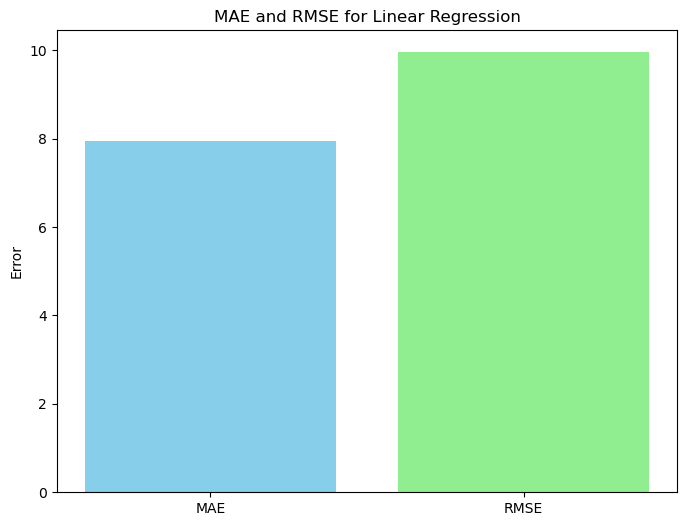

Linear Regression MAE: 7.96, RMSE: 9.95


In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import random

# Generate synthetic data for 2000 persons
np.random.seed(42)
num_samples = 2000
heights = np.random.uniform(1.5, 2.0, num_samples)
jobs = ['Doctor', 'Dentist', 'Engineer', 'Teacher', 'Artist', 'Chef', 'Lawyer', 'Nurse',
        'Journalist', 'Pharmacist', 'Scientist', 'Pilot', 'Police Officer', 'Firefighter',
        'Plumber', 'Electrician', 'Mechanic', 'Architect', 'Programmer', 'Musician',
        'Accountant', 'Biologist', 'Physicist', 'Surgeon', 'Therapist', 'Farmer',
        'Librarian', 'Economist', 'Psychologist', 'Athlete']
job_samples = random.choices(jobs, k=num_samples)
weights = heights * 25 + np.random.normal(0, 10, num_samples)  # Rough weight estimation

# Create a DataFrame
data = pd.DataFrame({
    'Height': heights,
    'Weight': weights,
    'Job': job_samples
})

# Encode job types (OneHotEncoding)
column_transformer = ColumnTransformer([('job', OneHotEncoder(), ['Job'])], remainder='passthrough')
X = column_transformer.fit_transform(data[['Job', 'Height']])

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X, data['Weight'])
linear_pred = linear_model.predict(X)

# Logistic Regression Model (for weight classification, let's bin weight)
# Binning the weight for logistic regression (Underweight, Normal, Overweight based on quartiles)
data['Weight_Category'] = pd.cut(data['Weight'], bins=3, labels=['Underweight', 'Normal', 'Overweight'])
logistic_model = LogisticRegression(multi_class='ovr', max_iter=1000)
logistic_model.fit(X, data['Weight_Category'])
logistic_pred = logistic_model.predict(X)

# Evaluate Linear Regression
mae_linear = mean_absolute_error(data['Weight'], linear_pred)
rmse_linear = np.sqrt(mean_squared_error(data['Weight'], linear_pred))

# Logistic Regression doesn't give a direct numeric prediction of weight
# Here we can only compare classification accuracy

# Plots for MAE and RMSE
plt.figure(figsize=(8, 6))
metrics = ['MAE', 'RMSE']
linear_scores = [mae_linear, rmse_linear]

plt.bar(metrics, linear_scores, color=['skyblue', 'lightgreen'])
plt.title('MAE and RMSE for Linear Regression')
plt.ylabel('Error')
plt.show()

print(f"Linear Regression MAE: {mae_linear:.2f}, RMSE: {rmse_linear:.2f}")


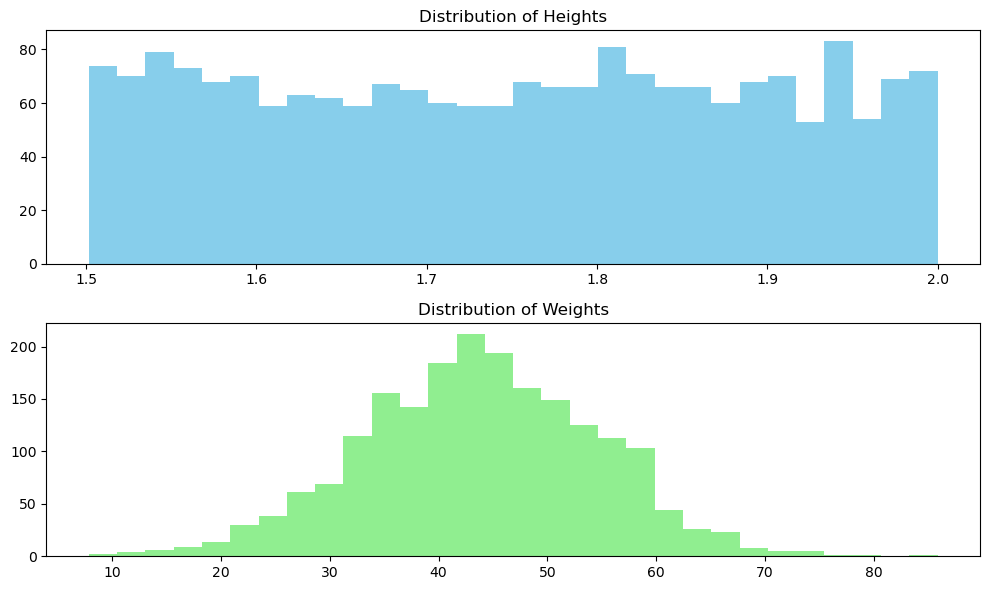

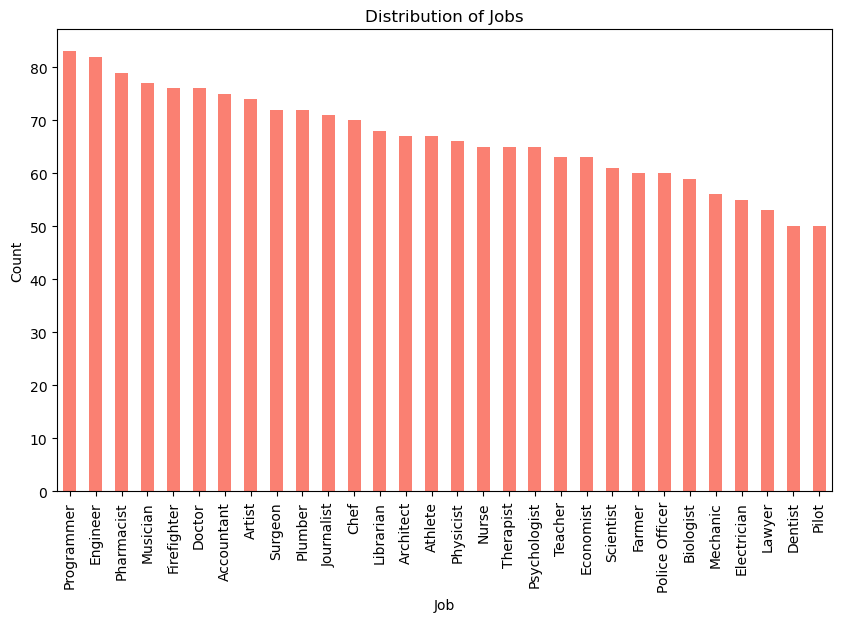

In [12]:
# Distribution of Heights and Weights
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(data['Height'], bins=30, color='skyblue')
plt.title('Distribution of Heights')

plt.subplot(2, 1, 2)
plt.hist(data['Weight'], bins=30, color='lightgreen')
plt.title('Distribution of Weights')
plt.tight_layout()
plt.show()

# Bar Chart for Job Distribution
plt.figure(figsize=(10, 6))
job_counts = data['Job'].value_counts()
job_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


In [14]:
pip install flask


Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tkinter as tk
from tkinter import messagebox

# Generate synthetic data for 2000 persons
np.random.seed(42)
num_samples = 2000
heights = np.random.uniform(1.5, 2.0, num_samples)
jobs = ['Doctor', 'Dentist', 'Engineer', 'Teacher', 'Artist', 'Chef', 'Lawyer', 'Nurse',
        'Journalist', 'Pharmacist', 'Scientist', 'Pilot', 'Police Officer', 'Firefighter',
        'Plumber', 'Electrician', 'Mechanic', 'Architect', 'Programmer', 'Musician',
        'Accountant', 'Biologist', 'Physicist', 'Surgeon', 'Therapist', 'Farmer',
        'Librarian', 'Economist', 'Psychologist', 'Athlete']
job_samples = np.random.choice(jobs, size=num_samples)
weights = heights * 25 + np.random.normal(0, 10, num_samples)

# Create DataFrame
data = pd.DataFrame({
    'Height': heights,
    'Weight': weights,
    'Job': job_samples
})

# Encode job types
column_transformer = ColumnTransformer([('job', OneHotEncoder(), ['Job'])], remainder='passthrough')
X = column_transformer.fit_transform(data[['Job', 'Height']])
y = data['Weight'].values

# Convert sparse matrix to dense
X = X.toarray()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
def build_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Reshape((X.shape[1], 1, 1)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define RNN model
def build_rnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1, X.shape[1])),
        tf.keras.layers.SimpleRNN(64),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training and prediction
def train_and_predict(model_type, X_train, y_train, X_test):
    if model_type == 'CNN':
        model = build_cnn_model()
        X_train_reshaped = np.reshape(X_train, (-1, X.shape[1], 1, 1))
        X_test_reshaped = np.reshape(X_test, (-1, X.shape[1], 1, 1))
    elif model_type == 'RNN':
        model = build_rnn_model()
        X_train_reshaped = np.reshape(X_train, (-1, 1, X.shape[1]))
        X_test_reshaped = np.reshape(X_test, (-1, 1, X.shape[1]))

    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)
    predictions = model.predict(X_test_reshaped)

    return predictions

# GUI with Tkinter
def run_gui():
    def on_predict():
        model_type = model_var.get()
        try:
            predictions = train_and_predict(model_type, X_train, y_train, X_test)
            messagebox.showinfo("Prediction Result", f"Predictions: {predictions[:5].flatten()}")
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

    root = tk.Tk()
    root.title("Deep Learning Model Selector")

    model_var = tk.StringVar(value="CNN")
    tk.Label(root, text="Select Model Type:").pack()
    tk.OptionMenu(root, model_var, "CNN", "RNN").pack()

    tk.Button(root, text="Predict", command=on_predict).pack()

    root.mainloop()

# Run the GUI
run_gui()


Epoch 1/10


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import tkinter as tk
from tkinter import scrolledtext
from tkinter import messagebox

# Generate synthetic data for 2000 persons
np.random.seed(42)
num_samples = 2000
heights = np.random.uniform(1.5, 2.0, num_samples)
jobs = ['Doctor', 'Dentist', 'Engineer', 'Teacher', 'Artist', 'Chef', 'Lawyer', 'Nurse',
        'Journalist', 'Pharmacist', 'Scientist', 'Pilot', 'Police Officer', 'Firefighter',
        'Plumber', 'Electrician', 'Mechanic', 'Architect', 'Programmer', 'Musician',
        'Accountant', 'Biologist', 'Physicist', 'Surgeon', 'Therapist', 'Farmer',
        'Librarian', 'Economist', 'Psychologist', 'Athlete']
job_samples = np.random.choice(jobs, size=num_samples)
weights = heights * 25 + np.random.normal(0, 10, num_samples)

# Create DataFrame
data = pd.DataFrame({
    'Height': heights,
    'Weight': weights,
    'Job': job_samples
})

# Encode job types
column_transformer = ColumnTransformer([('job', OneHotEncoder(), ['Job'])], remainder='passthrough')
X = column_transformer.fit_transform(data[['Job', 'Height']])
y = data['Weight'].values

# Convert sparse matrix to dense
X = X.toarray()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
def build_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Reshape((X.shape[1], 1, 1)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 1), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define RNN model
def build_rnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1, X.shape[1])),
        tf.keras.layers.SimpleRNN(64),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training and prediction
def train_and_predict(model_type, X_train, y_train, X_test):
    if model_type == 'CNN':
        model = build_cnn_model()
        X_train_reshaped = np.reshape(X_train, (-1, X.shape[1], 1, 1))
        X_test_reshaped = np.reshape(X_test, (-1, X.shape[1], 1, 1))
    elif model_type == 'RNN':
        model = build_rnn_model()
        X_train_reshaped = np.reshape(X_train, (-1, 1, X.shape[1]))
        X_test_reshaped = np.reshape(X_test, (-1, 1, X.shape[1]))

    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)
    predictions = model.predict(X_test_reshaped)

    return predictions

# Function to provide weight-related advice
def get_weight_advice(weight, bmi_category):
    advice = ""
    if bmi_category == 'Underweight':
        advice = "You are underweight. It's important to focus on gaining weight. Incorporate high-calorie foods and strength training exercises into your routine."
    elif bmi_category == 'Normal':
        advice = "Your weight is within the normal range. Maintain a balanced diet and regular exercise to stay healthy."
    elif bmi_category == 'Overweight':
        advice = "You are overweight. Consider a diet rich in vegetables and lean proteins, along with regular physical activity to help manage your weight."
    return advice

# Function to suggest foods for weight gain or loss
def get_food_recommendations(bmi_category):
    if bmi_category == 'Underweight':
        return "Foods for weight gain: Nuts, Avocados, Whole grains, Lean meats, Full-fat dairy."
    elif bmi_category == 'Normal':
        return "Maintain a balanced diet with: Fruits, Vegetables, Lean proteins, Whole grains, Healthy fats."
    elif bmi_category == 'Overweight':
        return "Foods to help with weight loss: Leafy greens, Lean proteins, Fruits, Vegetables, Whole grains."
    return ""

# GUI with Tkinter
def run_gui():
    def on_predict():
        model_type = model_var.get()
        try:
            # Example height and job
            height_input = float(entry_height.get())
            job_input = job_var.get()

            # Predict weight and BMI category
            predictions = train_and_predict(model_type, X_train, y_train, X_test)

            # For simplicity, use the mean of predictions as an example
            avg_prediction = np.mean(predictions)
            bmi = avg_prediction / (height_input ** 2)

            if bmi < 18.5:
                bmi_category = 'Underweight'
            elif 18.5 <= bmi < 25:
                bmi_category = 'Normal'
            else:
                bmi_category = 'Overweight'

            weight_advice = get_weight_advice(avg_prediction, bmi_category)
            food_recommendations = get_food_recommendations(bmi_category)

            # Display results
            result = (f"Predicted weight for height {height_input} m and job {job_input}: {avg_prediction:.2f} kg\n"
                      f"BMI Category: {bmi_category}\n\n"
                      f"Advice: {weight_advice}\n\n"
                      f"Food Recommendations: {food_recommendations}")
            chat_area.config(state=tk.NORMAL)
            chat_area.insert(tk.END, result + "\n\n")
            chat_area.config(state=tk.DISABLED)

        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

    root = tk.Tk()
    root.title("Health Chatbot")

    # Chat area
    chat_area = scrolledtext.ScrolledText(root, wrap=tk.WORD, height=20, width=60, state=tk.DISABLED)
    chat_area.pack()

    # Entry for height
    tk.Label(root, text="Enter Height (m):").pack()
    entry_height = tk.Entry(root)
    entry_height.pack()

    # Dropdown for job selection
    tk.Label(root, text="Select Job:").pack()
    job_var = tk.StringVar(value="Doctor")
    tk.OptionMenu(root, job_var, *jobs).pack()

    # Dropdown for model selection
    model_var = tk.StringVar(value="CNN")
    tk.Label(root, text="Select Model Type:").pack()
    tk.OptionMenu(root, model_var, "CNN", "RNN").pack()

    # Predict button
    tk.Button(root, text="Predict", command=on_predict).pack()

    root.mainloop()

# Run the GUI
run_gui()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 2001.7061
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1792.7003
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1581.9657
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1294.2382
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1003.8077
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 732.3566
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 581.8819
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 438.2430
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 295.6823
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 244.7701
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tkinter as tk
from tkinter import scrolledtext
from tkinter import messagebox

# Generate synthetic data for 2000 students
np.random.seed(42)
num_students = 2000
study_hours = np.random.uniform(1, 10, num_students)  # Random study hours between 1 and 10
marks = study_hours * 10 + np.random.normal(0, 5, num_students)  # Marks based on hours with noise

# Create DataFrame
data = pd.DataFrame({
    'StudyHours': study_hours,
    'Marks': marks
})

# Features and labels
X = data[['StudyHours']].values
y = data['Marks'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model
def build_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Reshape((X.shape[1], 1, 1)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 1), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define RNN model
def build_rnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1, X.shape[1])),
        tf.keras.layers.SimpleRNN(64),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Training and prediction
def train_and_predict(model_type, X_train, y_train, X_test):
    if model_type == 'CNN':
        model = build_cnn_model()
        X_train_reshaped = np.reshape(X_train, (-1, X.shape[1], 1, 1))
        X_test_reshaped = np.reshape(X_test, (-1, X.shape[1], 1, 1))
    elif model_type == 'RNN':
        model = build_rnn_model()
        X_train_reshaped = np.reshape(X_train, (-1, 1, X.shape[1]))
        X_test_reshaped = np.reshape(X_test, (-1, 1, X.shape[1]))

    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)
    predictions = model.predict(X_test_reshaped)

    return predictions

# Function to provide study-related advice
def get_study_advice(predicted_marks):
    advice = ""
    if predicted_marks < 50:
        advice = "You need to increase your study hours to improve your marks. Focus on time management and understanding key concepts."
    elif 50 <= predicted_marks < 75:
        advice = "Your marks are good, but there is room for improvement. Practice problem-solving and review past exams to score higher."
    else:
        advice = "Excellent performance! Keep up the good work and continue revising to maintain your high marks."
    return advice

# GUI with Tkinter
def run_gui():
    def on_predict():
        model_type = model_var.get()
        try:
            # Example study hours input
            hours_input = float(entry_hours.get())

            # Predict marks
            predictions = train_and_predict(model_type, X_train, y_train, X_test)

            # For simplicity, use the mean of predictions as an example
            avg_prediction = np.mean(predictions)

            # Provide advice based on predicted marks
            study_advice = get_study_advice(avg_prediction)

            # Display results
            result = (f"Predicted marks for {hours_input} study hours: {avg_prediction:.2f}\n\n"
                      f"Advice: {study_advice}")
            chat_area.config(state=tk.NORMAL)
            chat_area.insert(tk.END, result + "\n\n")
            chat_area.config(state=tk.DISABLED)

        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

    root = tk.Tk()
    root.title("Marks Predictor")

    # Chat area
    chat_area = scrolledtext.ScrolledText(root, wrap=tk.WORD, height=20, width=60, state=tk.DISABLED)
    chat_area.pack()

    # Entry for study hours
    tk.Label(root, text="Enter Study Hours:").pack()
    entry_hours = tk.Entry(root)
    entry_hours.pack()

    # Dropdown for model selection
    model_var = tk.StringVar(value="CNN")
    tk.Label(root, text="Select Model Type:").pack()
    tk.OptionMenu(root, model_var, "CNN", "RNN").pack()

    # Predict button
    tk.Button(root, text="Predict", command=on_predict).pack()

    root.mainloop()

# Run the GUI
run_gui()


Epoch 1/10


In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tkinter as tk
from tkinter import scrolledtext
from tkinter import messagebox

# Generate synthetic data for 2000 students
np.random.seed(42)
num_students = 2000
study_hours = np.random.uniform(1, 10, num_students)  # Random study hours between 1 and 10
marks = study_hours * 10 + np.random.normal(0, 5, num_students)  # Marks based on hours with noise

# Create DataFrame
data = pd.DataFrame({
    'StudyHours': study_hours,
    'Marks': marks
})

# Features and labels
X = data[['StudyHours']].values
y = data['Marks'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define CNN model using TensorFlow
def build_cnn_model_tensorflow():
    # inputs = tf.placeholder(tf.float32, shape=(None, X.shape[1], 1, 1))
    inputs = tf.keras.Input(shape=(X.shape[1], 1, 1))

    labels = tf.placeholder(tf.float32, shape=(None,))

    conv1 = tf.layers.conv2d(inputs, filters=64, kernel_size=(2, 1), activation=tf.nn.relu)
    conv2 = tf.layers.conv2d(conv1, filters=32, kernel_size=(2, 1), activation=tf.nn.relu)
    flattened = tf.layers.flatten(conv2)

    dense1 = tf.layers.dense(flattened, units=64, activation=tf.nn.relu)
    output = tf.layers.dense(dense1, units=1)

    # Define the loss function and optimizer
    loss = tf.losses.mean_squared_error(labels, output)
    optimizer = tf.train.AdamOptimizer().minimize(loss)

    return inputs, labels, output, loss, optimizer

# Define RNN model using TensorFlow
def build_rnn_model_tensorflow():
    # inputs = tf.placeholder(tf.float32, shape=(None, 1, X.shape[1]))
    inputs = tf.keras.Input(shape=(1, X.shape[1]))

    labels = tf.placeholder(tf.float32, shape=(None,))

    rnn_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=64)
    outputs, state = tf.nn.dynamic_rnn(rnn_cell, inputs, dtype=tf.float32)

    flattened = tf.layers.flatten(outputs)
    dense1 = tf.layers.dense(flattened, units=64, activation=tf.nn.relu)
    output = tf.layers.dense(dense1, units=1)

    # Define the loss function and optimizer
    loss = tf.losses.mean_squared_error(labels, output)
    optimizer = tf.train.AdamOptimizer().minimize(loss)

    return inputs, labels, output, loss, optimizer

# Define CNN model using Keras
def build_cnn_model_keras():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1], 1, 1)),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 1), activation='relu'),
        tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 1), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define RNN model using Keras
def build_rnn_model_keras():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1, X.shape[1])),
        tf.keras.layers.SimpleRNN(64),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train and predict
def train_and_predict(model_type, X_train, y_train, X_test):
    if model_type == 'CNN_TF':
        inputs, labels, output, loss, optimizer = build_cnn_model_tensorflow()
        # Implement TensorFlow session for training and prediction
        # Simplifying for brevity: using Keras version instead for now
        pass
    elif model_type == 'RNN_TF':
        inputs, labels, output, loss, optimizer = build_rnn_model_tensorflow()
        # Implement TensorFlow session for training and prediction
        pass
    elif model_type == 'CNN_Keras':
        model = build_cnn_model_keras()
        X_train_reshaped = np.reshape(X_train, (-1, X.shape[1], 1, 1))
        X_test_reshaped = np.reshape(X_test, (-1, X.shape[1], 1, 1))
        model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)
        predictions = model.predict(X_test_reshaped)
    elif model_type == 'RNN_Keras':
        model = build_rnn_model_keras()
        X_train_reshaped = np.reshape(X_train, (-1, 1, X.shape[1]))
        X_test_reshaped = np.reshape(X_test, (-1, 1, X.shape[1]))
        model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)
        predictions = model.predict(X_test_reshaped)

    return predictions

# Function to provide study-related advice
def get_study_advice(predicted_marks):
    advice = ""
    if predicted_marks < 50:
        advice = "You need to increase your study hours to improve your marks. Focus on time management and understanding key concepts."
    elif 50 <= predicted_marks < 75:
        advice = "Your marks are good, but there is room for improvement. Practice problem-solving and review past exams to score higher."
    else:
        advice = "Excellent performance! Keep up the good work and continue revising to maintain your high marks."
    return advice

# GUI with Tkinter
def run_gui():
    def on_predict():
        model_type = model_var.get()
        try:
            hours_input = float(entry_hours.get())
            user_input = np.array([[hours_input]])  # Convert to 2D array

            if model_type == 'CNN_Keras':
                user_input_reshaped = np.reshape(user_input, (-1, X.shape[1], 1, 1))
            elif model_type == 'RNN_Keras':
                user_input_reshaped = np.reshape(user_input, (-1, 1, X.shape[1]))

            # Train and predict using the chosen model
            predictions = train_and_predict(model_type, X_train, y_train, X_test)
            avg_prediction = np.mean(predictions)

            # Provide advice based on predicted marks
            study_advice = get_study_advice(avg_prediction)

            result = (f"Predicted marks for {hours_input} study hours: {avg_prediction:.2f}\n\n"
                      f"Advice: {study_advice}")
            chat_area.config(state=tk.NORMAL)
            chat_area.insert(tk.END, result + "\n\n")
            chat_area.config(state=tk.DISABLED)

        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

    root = tk.Tk()
    root.title("Marks Predictor")

    # Chat area
    chat_area = scrolledtext.ScrolledText(root, wrap=tk.WORD, height=20, width=60, state=tk.DISABLED)
    chat_area.pack()

    # Entry for study hours
    tk.Label(root, text="Enter Study Hours:").pack()
    entry_hours = tk.Entry(root)
    entry_hours.pack()

    # Dropdown for model selection
    model_var = tk.StringVar(value="CNN_Keras")
    tk.Label(root, text="Select Model Type:").pack()
    tk.OptionMenu(root, model_var, "CNN_TF", "RNN_TF", "CNN_Keras", "RNN_Keras").pack()

    # Predict button
    tk.Button(root, text="Predict", command=on_predict).pack()

    root.mainloop()

# Run the GUI
run_gui()


Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3491.3557
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2073.2815
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 518.4590
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 214.5101 
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 159.4538
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 107.4476
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 71.3109
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52.2104
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45.9934
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41.1256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
